In [30]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

#load Data

df= pd.read_csv(r'D:\Documents\Data Analysis Projects\Python1\movies.csv')

In [3]:
#Looking at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
#Checking for missing data

for col in df.columns:
    missing_data = np.mean(df[col].isnull())
    print('{} - {} items'.format(col, missing_data))

budget - 0.0 items
company - 0.0 items
country - 0.0 items
director - 0.0 items
genre - 0.0 items
gross - 0.0 items
name - 0.0 items
rating - 0.0 items
released - 0.0 items
runtime - 0.0 items
score - 0.0 items
star - 0.0 items
votes - 0.0 items
writer - 0.0 items
year - 0.0 items


In [6]:
#What are the datatypes?

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [9]:
#The Budget and Gross columns don't need to be floats
#Converting them to integers

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [32]:
#Corrected year column

df['year_corrected'] = df['released'].astype(str).str[:4]

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [33]:
#Sorting by highest grossing movies

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [15]:
#Displaying all rows in the dataset

pd.set_option('display.max_rows', None)

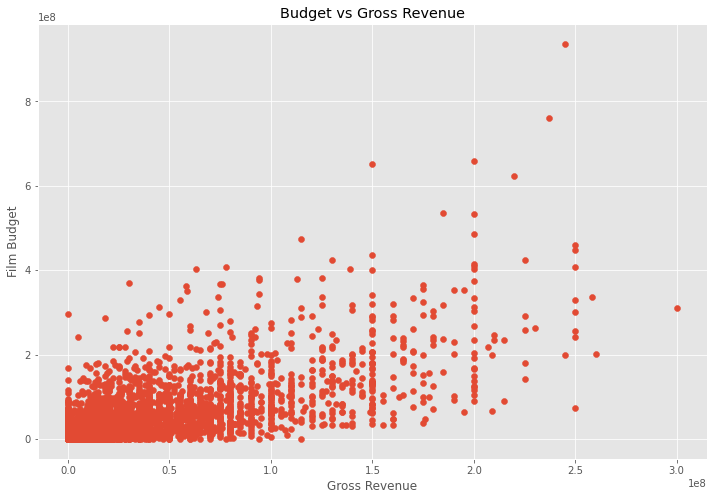

In [18]:
#Checking any correlation between budget and gross
#1. Scatter plot of budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Film Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

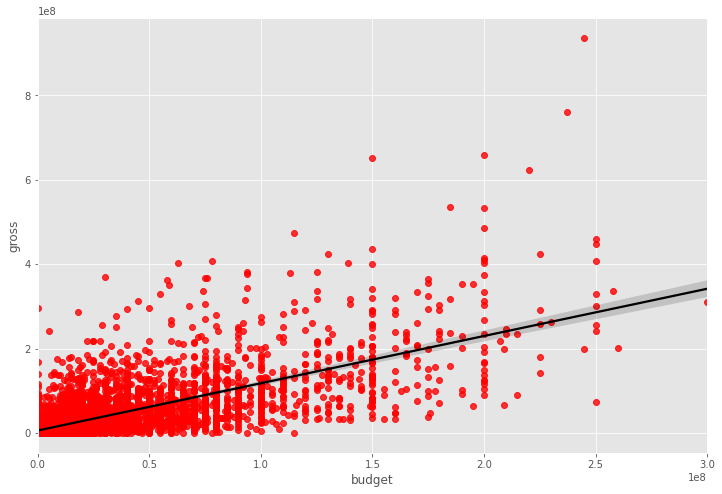

In [20]:
#2. Regression plot of budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"black"})

In [22]:
#3. Correlation coefficients
#3a. Pearson
df.corr(method='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


In [23]:
#3b. Kendall
df.corr(method='kendall')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.523459,0.164816,-0.019526,0.451137,0.214114
gross,0.523459,1.000000,0.139270,0.033163,0.479772,0.098585
runtime,0.164816,0.139270,1.000000,0.282068,0.195640,0.073785
score,-0.019526,0.033163,0.282068,1.000000,0.272967,0.070451
votes,0.451137,0.479772,0.195640,0.272967,1.000000,0.339625
year,0.214114,0.098585,0.073785,0.070451,0.339625,1.000000


In [24]:
#3c. Spearman
df.corr(method='spearman')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.698639,0.231672,-0.027868,0.616419,0.300553
gross,0.698639,1.000000,0.202905,0.045582,0.667869,0.139467
runtime,0.231672,0.202905,1.000000,0.398840,0.287150,0.107902
score,-0.027868,0.045582,0.398840,1.000000,0.392199,0.103598
votes,0.616419,0.667869,0.287150,0.392199,1.000000,0.485588
year,0.300553,0.139467,0.107902,0.103598,0.485588,1.000000


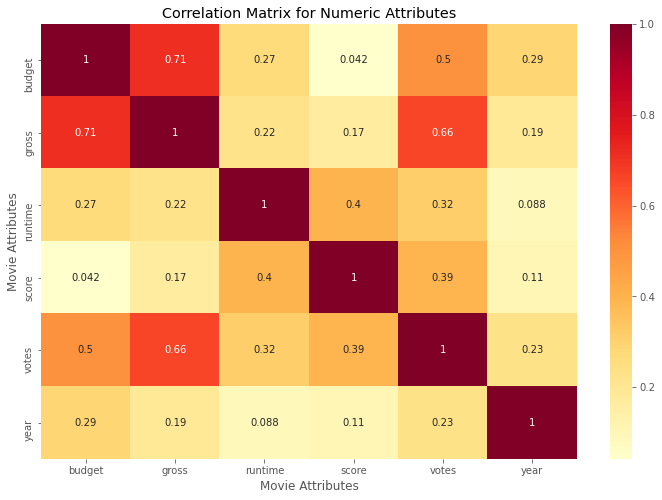

In [27]:
#Correlation Matrix

corr_mat = df.corr(method='pearson')
sns.heatmap(corr_mat, annot=True, cmap="YlOrRd")
plt.title('Correlation Matrix for Numeric Attributes')
plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')
plt.show()

In [28]:
#Giving the object fields numeric identifiers to check correlation

df_number=df

for col_name in df_number.columns:
    if(df_number[col_name].dtype == 'object'):
        df_number[col_name] = df_number[col_name].astype('category')
        df_number[col_name] = df_number[col_name].cat.codes
        
df_number.head(10)

#All object columns converted to numerical identifiers

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_corrected
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
4840,185000000,2123,54,440,0,534858444,5189,7,1696,152,9.0,408,1839571,2090,2008,22
6614,200000000,1428,54,835,0,532177324,4206,7,2363,133,7.9,739,365473,625,2016,30
6687,200000000,1720,54,128,2,486295561,1836,6,2328,97,7.4,678,173005,201,2016,30
2870,115000000,1428,54,885,0,474544677,4675,6,1012,136,6.5,729,584809,1334,1999,13
6398,250000000,1491,54,1412,0,459005868,502,7,2239,141,7.4,2001,537832,2145,2015,29


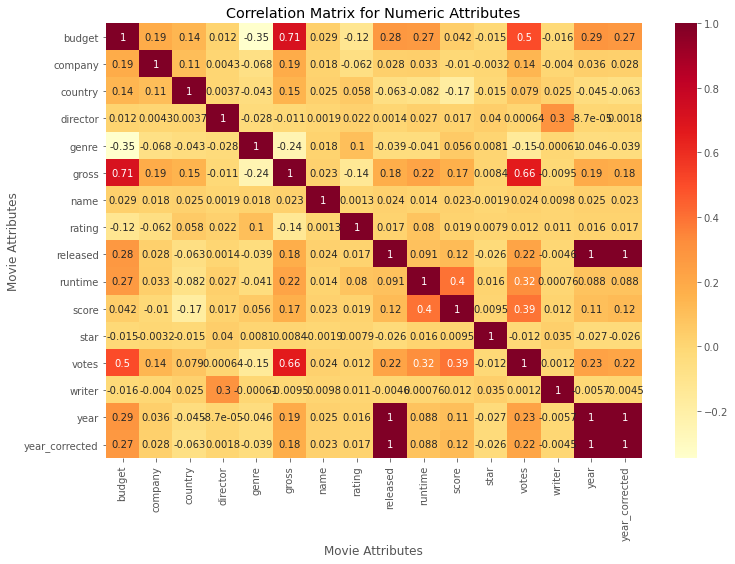

In [36]:
#Checking correlation with converted categories
corr_mat2 = df_number.corr(method='pearson')
sns.heatmap(corr_mat2, annot=True, cmap="YlOrRd")
plt.title('Correlation Matrix for Numeric Attributes')
plt.xlabel('Movie Attributes')
plt.ylabel('Movie Attributes')
plt.show()

In [39]:
#Unstacking the correlation matrix and reorganizing it

corr_pairs = corr_mat2.unstack()
sorted_pairs = corr_pairs.sort_values()
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]
strong_pairs

#Budget and Votes have highest correlation with Gross revenue
#Budget and Gross = 0.71
#Votes and Gross = 0.66

votes           budget            0.503924
budget          votes             0.503924
votes           gross             0.662457
gross           votes             0.662457
                budget            0.712196
budget          gross             0.712196
released        year              0.996187
year            released          0.996187
year_corrected  year              0.996229
year            year_corrected    0.996229
year_corrected  released          0.999389
released        year_corrected    0.999389
budget          budget            1.000000
writer          writer            1.000000
votes           votes             1.000000
star            star              1.000000
score           score             1.000000
runtime         runtime           1.000000
released        released          1.000000
rating          rating            1.000000
name            name              1.000000
gross           gross             1.000000
genre           genre             1.000000
director   

In [40]:
#Top 15 Companies by Gross Revenue

company_gross_sum = df.groupby('company')[["gross"]].sum()
company_gross_sum_sorted = company_gross_sum.sort_values('gross', ascending = False)[:15]
company_gross_sum_sorted = company_gross_sum_sorted['gross'].astype('int64') 
company_gross_sum_sorted

company
Warner Bros.                              21322318408
Universal Pictures                        19430051320
Paramount Pictures                        17115702495
Twentieth Century Fox Film Corporation    14788570587
Walt Disney Pictures                      10455507123
Columbia Pictures                          8824216545
New Line Cinema                            8540112287
Columbia Pictures Corporation              7720114061
Touchstone Pictures                        6688156475
DreamWorks                                 5458121021
DreamWorks Animation                       4143974397
Metro-Goldwyn-Mayer (MGM)                  3384812932
Pixar Animation Studios                    3242024778
Fox 2000 Pictures                          3113861473
TriStar Pictures                           2967117827
Name: gross, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='gross'>

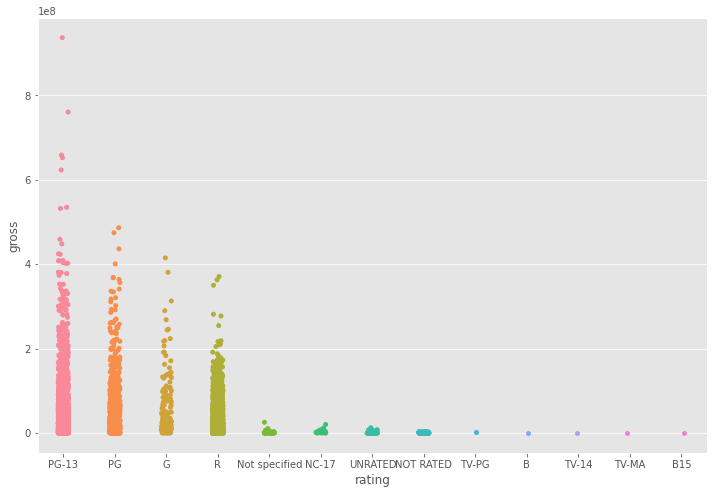

In [44]:
#Strip Plot of Rating vs Gross
sns.stripplot(x="rating", y="gross", data=df)
